### This notebook will focus completely on text classification based on Natural Language Processing.

##### It's not yet completed, let's understand it first.

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import random

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


> ## Data AnalysisTokenizer

In [3]:
data = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'tweet']
data.head()

,target,ids,date,flag,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
# Dropping unnecessary columns

data = data.drop(['date', 'flag', 'user'], axis=1)
data.head()

,target,ids,tweet
0,0,1467810672,is upset that he can't update his Facebook by ...
1,0,1467810917,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,@Kwesidei not the whole crew


In [6]:
data.target.unique()

array([0, 4])

In [7]:
#Let's check if there are any NULL values
data.isnull().sum().sum()

0

#### So there are 0 NULL values, and 0 is for -ve and 4 for +ve tweet.

> ## Preparing data

In [8]:
data.head()

,target,ids,tweet
0,0,1467810672,is upset that he can't update his Facebook by ...
1,0,1467810917,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,@Kwesidei not the whole crew


In [9]:
data.columns

Index(['target', 'ids', 'tweet'], dtype='object')

In [10]:
def get_tweets(dataset):
    tweets = [x for x in dataset['tweet']]
    labels = [x for x in dataset['target']]
    return tweets, labels

In [11]:
tweets, labels = get_tweets(data)

In [12]:
tweets[0], labels[0]

("is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 0)

> ## Tokenizing

In [13]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[0]]))

[[9, 819, 18, 112, 70, 566, 194, 537, 127, 2098, 10, 7, 300, 552, 86, 5, 2400, 150, 41, 274, 1171]]


> ## Padding and Truncating

1. Checking length of the tweets
2. Creating padded sequences

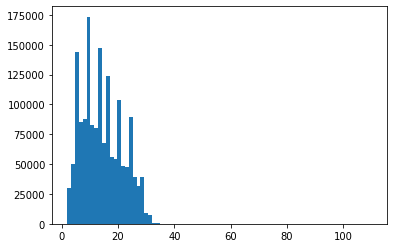

In [16]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

#### We can see that the maximum length is approx 35

In [18]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=35, padding='post')
    return padded_sequences

In [19]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [22]:
padded_train_sequences[0], padded_train_sequences[10], padded_train_sequences[1000]

(array([   9,  819,   18,  112,   70,  566,  194,  537,  127, 2098,   10,
           7,  300,  552,   86,    5, 2400,  150,   41,  274, 1171,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0], dtype=int32),
 array([   2,   21,  685, 6467,    6, 1944,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0], dtype=int32),
 array([  20,  186,    6,  634,   43, 1074, 1356,  301,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0], dtype=int32))

> ## Preparing the labels

In [23]:
classes = set(labels)
print(classes)

{0, 4}


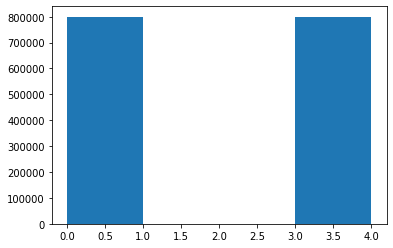

In [26]:
plt.hist(labels, bins=4)
plt.show()

In [27]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [28]:
classes_to_index

{0: 0, 4: 1}

In [29]:
index_to_classes

{0: 0, 1: 4}

In [30]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [31]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


> ## Creating the model

1. Creating the model
2. Compiling the model

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

2022-04-26 16:19:40.919655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 16:19:41.014104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 16:19:41.015226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 16:19:41.017646: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


> ## Training the model

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    epochs=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)
    ]
)

Epoch 1/2
50000/50000 [==============================] - 499s 10ms/step - loss: 0.3949 - accuracy: 0.8201
Epoch 2/2
23827/50000 [=============>................] - ETA: 4:20 - loss: 0.3734 - accuracy: 0.8319

> ## Evaluating the model